In [1]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=680b87e3fb2bd01d58e25ee5a8524bcc36d567d57d8b502c2d6d83e01aeb982b
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from tqdm import tqdm
import os
import wget
import requests

sumber = https://www.kaggle.com/cornflake15/denpasarbalihistoricalweatherdata <br>
### **Context**

This is historical weather data of Denpasar, Bali, Indonesia. <br>
### **Content**

Contains weather data from Januari 1st, 1990 until Januari 7th 2020 (20 years, hourly)<br>

In [3]:
if os.path.isfile('archive.zip'):
    print("File Sudah ada")
else:
    wget.download(
        url='https://drive.google.com/uc?export=download&id=1_Q7AFxTbytUh_4HFjUWtUTDPjWtkQt90'
    )
    print("\nDownload Selesai")


Download Selesai


In [4]:
with zipfile.ZipFile('archive.zip', mode='r') as zip_file:
    for zf in tqdm(zip_file.infolist(), desc="Extracting"):
        try:
            zip_file.extract(zf)                
        except Exception as e:
            print(e)
zip_file.close()

Extracting: 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]


In [5]:
df = pd.read_csv('/content/openweatherdata-denpasar-1990-2020.csv', parse_dates=['dt_iso'])
df.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,wind_deg,rain_1h,rain_3h,rain_6h,rain_12h,rain_24h,rain_today,snow_1h,snow_3h,snow_6h,snow_12h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,631152000,1990-01-01 00:00:00 +0000 UTC,28800,Denpasar,-8.652497,115.219117,25.82,25.82,25.82,1010.0,NaN,NaN,86,1.36,225,0.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98,500,Rain,light rain,10d
1,631155600,1990-01-01 01:00:00 +0000 UTC,28800,Denpasar,-8.652497,115.219117,26.20,26.20,26.20,1011.0,NaN,NaN,84,2.09,247,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91,500,Rain,light rain,10d
2,631159200,1990-01-01 02:00:00 +0000 UTC,28800,Denpasar,-8.652497,115.219117,26.45,26.45,26.45,1011.0,NaN,NaN,84,2.44,262,0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
3,631162800,1990-01-01 03:00:00 +0000 UTC,28800,Denpasar,-8.652497,115.219117,26.80,26.80,26.80,1011.0,NaN,NaN,82,2.29,271,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
4,631166400,1990-01-01 04:00:00 +0000 UTC,28800,Denpasar,-8.652497,115.219117,27.04,27.04,27.04,1010.0,NaN,NaN,82,1.71,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76,803,Clouds,broken clouds,04d


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264924 entries, 0 to 264923
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt                   264924 non-null  int64  
 1   dt_iso               264924 non-null  object 
 2   timezone             264924 non-null  int64  
 3   city_name            264924 non-null  object 
 4   lat                  264924 non-null  float64
 5   lon                  264924 non-null  float64
 6   temp                 264924 non-null  float64
 7   temp_min             264924 non-null  float64
 8   temp_max             264924 non-null  float64
 9   pressure             264924 non-null  float64
 10  sea_level            0 non-null       float64
 11  grnd_level           0 non-null       float64
 12  humidity             264924 non-null  int64  
 13  wind_speed           264924 non-null  float64
 14  wind_deg             264924 non-null  int64  
 15  rain_1h          

In [7]:
df.isnull().sum()

dt                          0
dt_iso                      0
timezone                    0
city_name                   0
lat                         0
lon                         0
temp                        0
temp_min                    0
temp_max                    0
pressure                    0
sea_level              264924
grnd_level             264924
humidity                    0
wind_speed                  0
wind_deg                    0
rain_1h                248638
rain_3h                248768
rain_6h                228826
rain_12h               264912
rain_24h               258107
rain_today             264924
snow_1h                264924
snow_3h                264924
snow_6h                264924
snow_12h               264924
snow_24h               264924
snow_today             264924
clouds_all                  0
weather_id                  0
weather_main                0
weather_description         0
weather_icon                0
dtype: int64

In [8]:
df.shape

(264924, 32)

In [9]:
missing_values_percent = df.isnull().sum()/len(df)
missing_values_percent

dt                     0.000000
dt_iso                 0.000000
timezone               0.000000
city_name              0.000000
lat                    0.000000
lon                    0.000000
temp                   0.000000
temp_min               0.000000
temp_max               0.000000
pressure               0.000000
sea_level              1.000000
grnd_level             1.000000
humidity               0.000000
wind_speed             0.000000
wind_deg               0.000000
rain_1h                0.938526
rain_3h                0.939016
rain_6h                0.863742
rain_12h               0.999955
rain_24h               0.974268
rain_today             1.000000
snow_1h                1.000000
snow_3h                1.000000
snow_6h                1.000000
snow_12h               1.000000
snow_24h               1.000000
snow_today             1.000000
clouds_all             0.000000
weather_id             0.000000
weather_main           0.000000
weather_description    0.000000
weather_

In [10]:
miss_val = missing_values_percent[missing_values_percent > 0].reset_index()
miss_val

,index,0
0,sea_level,1.000000
1,grnd_level,1.000000
2,rain_1h,0.938526
3,rain_3h,0.939016
4,rain_6h,0.863742
5,rain_12h,0.999955
6,rain_24h,0.974268
7,rain_today,1.000000
8,snow_1h,1.000000
9,snow_3h,1.000000


In [11]:
miss_val['index'].values

array(['sea_level', 'grnd_level', 'rain_1h', 'rain_3h', 'rain_6h',
       'rain_12h', 'rain_24h', 'rain_today', 'snow_1h', 'snow_3h',
       'snow_6h', 'snow_12h', 'snow_24h', 'snow_today'], dtype=object)

In [12]:
miss_cols = list(miss_val['index'].values)
miss_cols

['sea_level',
 'grnd_level',
 'rain_1h',
 'rain_3h',
 'rain_6h',
 'rain_12h',
 'rain_24h',
 'rain_today',
 'snow_1h',
 'snow_3h',
 'snow_6h',
 'snow_12h',
 'snow_24h',
 'snow_today']

### Delete 

In [13]:
df.drop(columns=miss_cols, inplace=True)

In [14]:
df.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,631152000,1990-01-01 00:00:00 +0000 UTC,28800,Denpasar,-8.652497,115.219117,25.82,25.82,25.82,1010.0,86,1.36,225,98,500,Rain,light rain,10d
1,631155600,1990-01-01 01:00:00 +0000 UTC,28800,Denpasar,-8.652497,115.219117,26.20,26.20,26.20,1011.0,84,2.09,247,91,500,Rain,light rain,10d
2,631159200,1990-01-01 02:00:00 +0000 UTC,28800,Denpasar,-8.652497,115.219117,26.45,26.45,26.45,1011.0,84,2.44,262,94,500,Rain,light rain,10d
3,631162800,1990-01-01 03:00:00 +0000 UTC,28800,Denpasar,-8.652497,115.219117,26.80,26.80,26.80,1011.0,82,2.29,271,94,500,Rain,light rain,10d
4,631166400,1990-01-01 04:00:00 +0000 UTC,28800,Denpasar,-8.652497,115.219117,27.04,27.04,27.04,1010.0,82,1.71,274,76,803,Clouds,broken clouds,04d


### Only use date and temp

In [15]:
data = df[['dt_iso','temp']]
data.head()

,dt_iso,temp
0,1990-01-01 00:00:00 +0000 UTC,25.82
1,1990-01-01 01:00:00 +0000 UTC,26.20
2,1990-01-01 02:00:00 +0000 UTC,26.45
3,1990-01-01 03:00:00 +0000 UTC,26.80
4,1990-01-01 04:00:00 +0000 UTC,27.04


In [16]:
data.columns = ['date','temp']

In [17]:
data.head()

,date,temp
0,1990-01-01 00:00:00 +0000 UTC,25.82
1,1990-01-01 01:00:00 +0000 UTC,26.20
2,1990-01-01 02:00:00 +0000 UTC,26.45
3,1990-01-01 03:00:00 +0000 UTC,26.80
4,1990-01-01 04:00:00 +0000 UTC,27.04


In [18]:
data['date'] = data["date"].str.split(' ', expand=True)[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
data.tail()

,date,temp
264919,2020-01-07,27.0
264920,2020-01-07,27.0
264921,2020-01-07,28.0
264922,2020-01-07,28.0
264923,2020-01-07,28.0


In [20]:
data.dtypes

date     object
temp    float64
dtype: object

In [21]:
data['date'] = pd.to_datetime(data['date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
data.head()

,date,temp
0,1990-01-01,25.82
1,1990-01-01,26.20
2,1990-01-01,26.45
3,1990-01-01,26.80
4,1990-01-01,27.04


In [23]:
data.date.dt.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

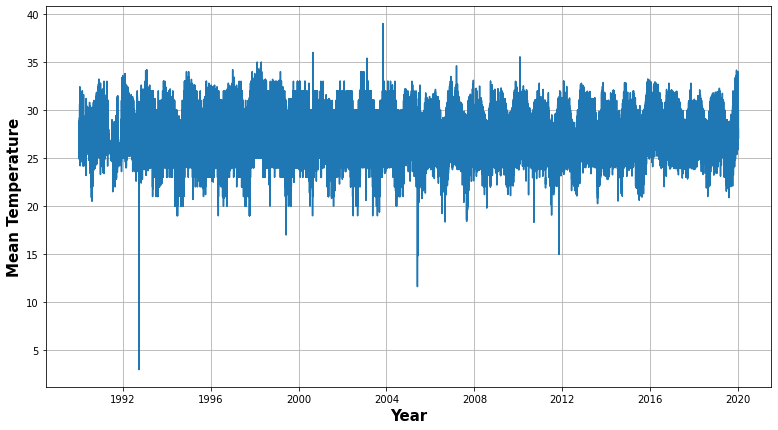

In [24]:
fig=plt.figure(figsize=(13,7))
ax = plt.axes()
plt.xlabel("Year",fontsize="15",fontweight="bold")
plt.ylabel("Mean Temperature",fontsize="15",fontweight="bold")
plt.grid(True)
plt.plot(data['date'], data['temp'])
plt.show()

In [25]:
daily_mean=data.groupby(data['date'].dt.day).mean()
monthly_mean=data.groupby(data['date'].dt.month).mean()
yearly_mean=data.groupby(data['date'].dt.year).mean()

In [26]:
daily_mean.head()

,temp
date,
1,27.273015
2,27.252181
3,27.225135
4,27.294496
5,27.325334


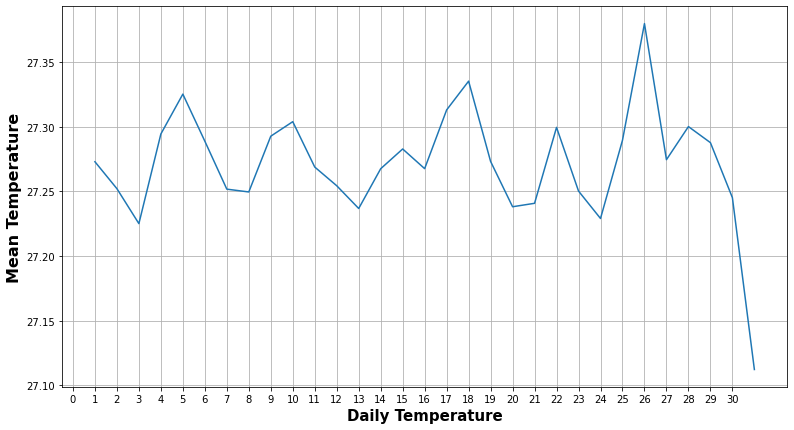

In [27]:
fig=plt.figure(figsize=(13,7))
ax=plt.axes()
plt.plot(daily_mean)
plt.grid(True)
plt.xticks(range(len(daily_mean)))
plt.xlabel("Daily Temperature",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=16,fontweight="bold")
plt.show()

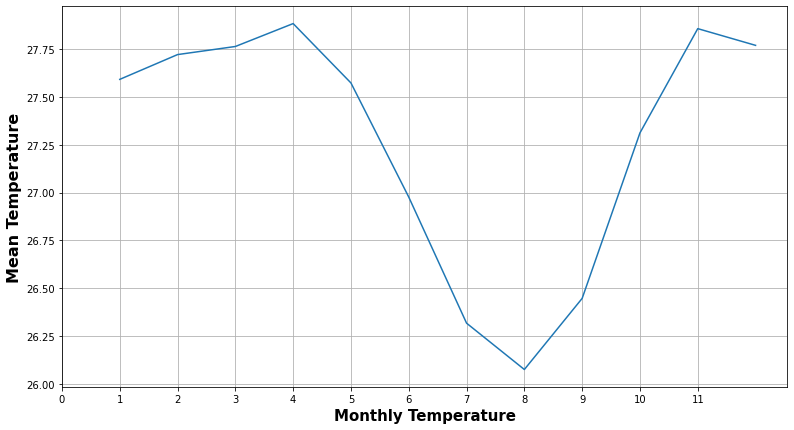

In [28]:
fig=plt.figure(figsize=(13,7))
ax=plt.axes()
plt.plot(monthly_mean)
plt.grid(True)
plt.xticks(range(len(monthly_mean)))
plt.xlabel("Monthly Temperature",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=16,fontweight="bold")
plt.show()

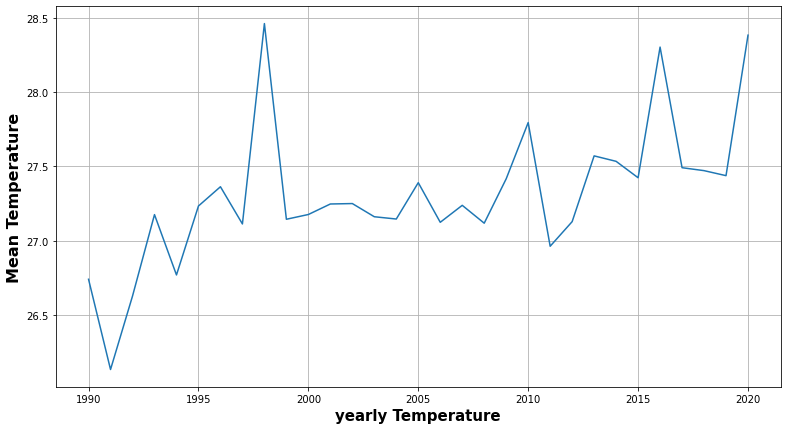

In [29]:
fig=plt.figure(figsize=(13,7))
ax=plt.axes()
plt.plot(yearly_mean)
plt.grid(True)
plt.xlabel("yearly Temperature",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=16,fontweight="bold")
plt.show()

### Split Dataset

Data tahun sebelum hingga 2012 jadi train dan sisanya test

In [30]:
data[data['date'].dt.year > 2015]['date'].dt.year.unique()

array([2016, 2017, 2018, 2019, 2020])

In [31]:
train = data[data['date'].dt.year <= 2013]['temp'].values
test = data[data['date'].dt.year > 2013]['temp'].values

train.shape, test.shape

((211745,), (53179,))

In [32]:
train.shape[0]/len(data)

0.7992669595808609

In [33]:
test.shape[0]/len(data)

0.20073304041913909

In [34]:
test.shape[0] + train.shape[0]

264924

In [35]:
len(data)

264924

### Modeling

In [36]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [37]:
train_set = windowed_dataset(train, window_size=60, batch_size=100, shuffle_buffer=1000)
test_set = windowed_dataset(test, window_size=60, batch_size=100, shuffle_buffer=1000)

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

callback=EarlyStopping(monitor="val_loss",patience=5, verbose=1, mode='min')

Callback yang digunakan disini adalah early stopping, kalo misalkan lossnya tidak berkurang sebanyak 5 kali maka akan berhenti training

In [39]:
model = tf.keras.models.Sequential([
    keras.layers.LSTM(60, return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(60),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1),
])

In [40]:
min_mae = (data['temp'].max() - data['temp'].min()) * 10/100 
min_mae

3.6

In [41]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-03, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [42]:
history = model.fit(train_set,epochs=50, callbacks=[callback], validation_data=test_set)

Epoch 1/50
2117/2117 [==============================] - 104s 45ms/step - loss: 1.5864 - mae: 2.0015 - val_loss: 0.3611 - val_mae: 0.7160
Epoch 2/50
2117/2117 [==============================] - 93s 44ms/step - loss: 0.4898 - mae: 0.8496 - val_loss: 0.2113 - val_mae: 0.5126
Epoch 3/50
2117/2117 [==============================] - 94s 44ms/step - loss: 0.4355 - mae: 0.7781 - val_loss: 0.2017 - val_mae: 0.4983
Epoch 4/50
2117/2117 [==============================] - 95s 45ms/step - loss: 0.4059 - mae: 0.7443 - val_loss: 0.2813 - val_mae: 0.6361
Epoch 5/50
2117/2117 [==============================] - 95s 45ms/step - loss: 0.3943 - mae: 0.7277 - val_loss: 0.1731 - val_mae: 0.4508
Epoch 6/50
2117/2117 [==============================] - 95s 45ms/step - loss: 0.3853 - mae: 0.7166 - val_loss: 0.2000 - val_mae: 0.4973
Epoch 7/50
2117/2117 [==============================] - 95s 45ms/step - loss: 0.3827 - mae: 0.7132 - val_loss: 0.1707 - val_mae: 0.4435
Epoch 8/50
2117/2117 [=========================

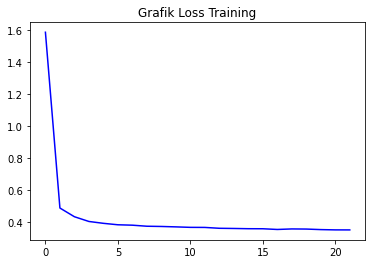

In [46]:
plt.plot(history.history['loss'],c='b')
plt.title("Grafik Loss Training")
plt.show()

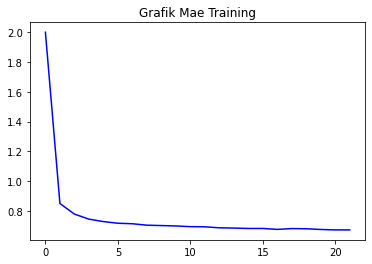

In [47]:
plt.plot(history.history['mae'],c='b')
plt.title("Grafik Mae Training")
plt.show()

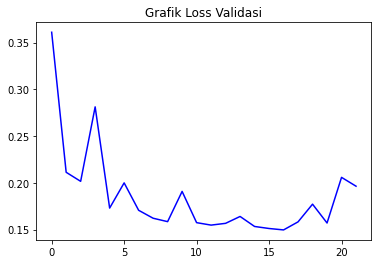

In [48]:
plt.plot(history.history['val_loss'],c='b')
plt.title("Grafik Loss Validasi")
plt.show()

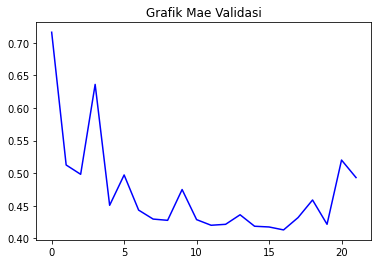

In [49]:
plt.plot(history.history['val_mae'],c='b')
plt.title("Grafik Mae Validasi")
plt.show()